## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn import model_selection as ms
from sklearn import metrics as m
from sklearn.metrics import mean_squared_error as mse

## Load data

In [2]:
df_raw = pd.read_csv('kc_house_data.csv')

In [3]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#df_raw.isnull().sum()
df_raw.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#Removing unnecessary variables 
df = df_raw.drop(['id','date','lat','zipcode','long'], axis=1)

In [82]:
# df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
#     'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]
# h = df1.hist(bins=15,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
# sns.despine(left=True, bottom=True)
# [x.title.set_size(12) for x in h.ravel()];
# [x.yaxis.tick_left() for x in h.ravel()];

## Some graphs 
As I can see, the bedrooms variable has some special values such as 33 or 11, but they are possible and they do not indicate a  huge price over that. The quantity of floors does not seam to influence that much on the price. About the grades given to the houses, it seams like the higher it is, the higher the price.Eventhough the bathroom variable is not discrete, it'is possible to see that as it grows, the price tends to grow too.

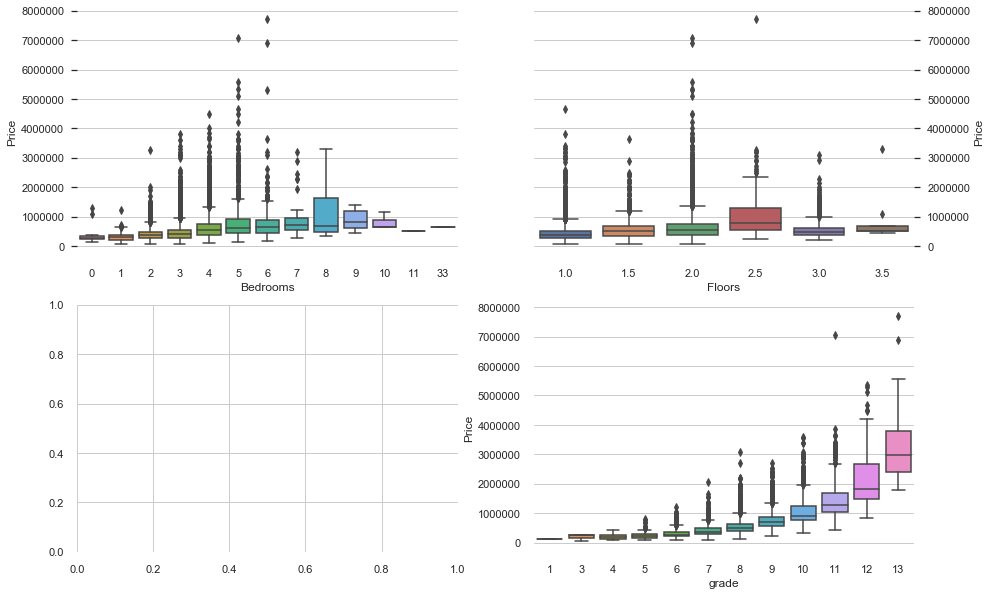

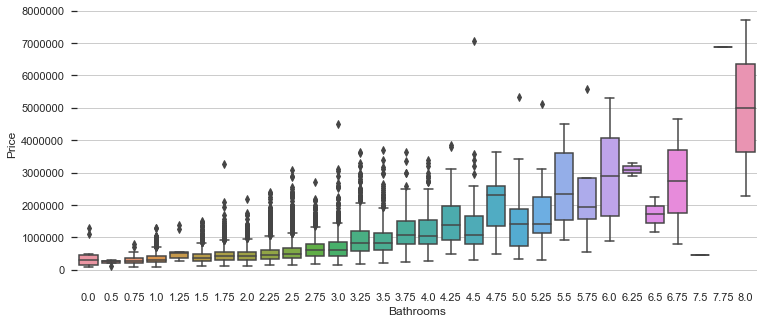

In [53]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(2, 2,figsize=(15,10))
sns.boxplot(x=df_raw['bedrooms'],y=df_raw['price'], ax=axes[0,0])
sns.boxplot(x=df_raw['floors'],y=df_raw['price'], ax=axes[0,1])
# sns.boxplot(x=df_raw['bathrooms'],y=df_raw['price'], ax=axes[1,0])
sns.boxplot(x=df_raw['grade'],y=df_raw['price'], ax=axes[1,1])
sns.despine(left=True, bottom=True)
axes[0,0].set(xlabel='Bedrooms', ylabel='Price')
axes[0,0].yaxis.tick_left()
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()
axes[0,1].set(xlabel='Floors', ylabel='Price')
# axes[1,0].set(xlabel='bathrooms', ylabel='Price')
axes[1,1].set(xlabel='grade', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

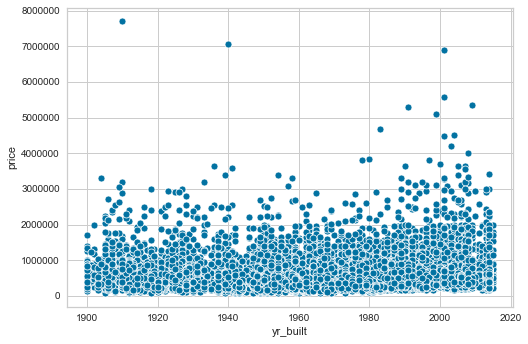

In [52]:
sns.scatterplot('yr_built', 'price', data=df)

About the heatmap and the barplot following below, all the variables have a positive correlation with the price, but the main ones are sqft_living, grade and sqft_above. 

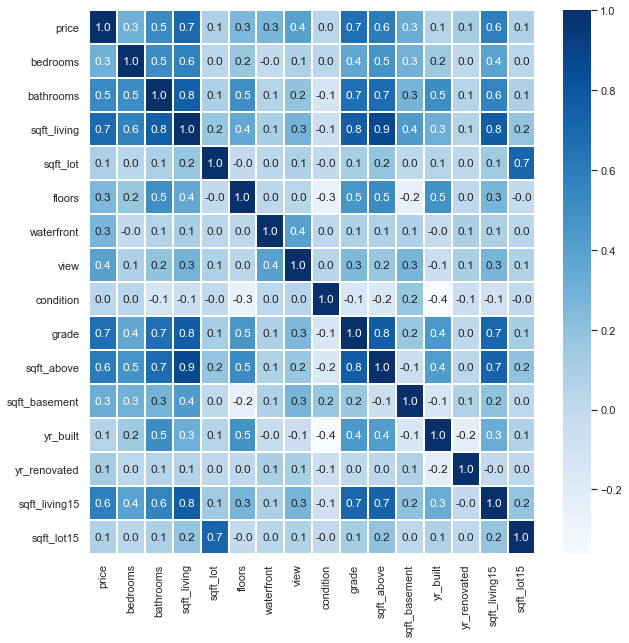

In [24]:
#Checking correlation between variables 
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), annot=True, lw=1, cmap='Blues',fmt='.1f')#
df.corr

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

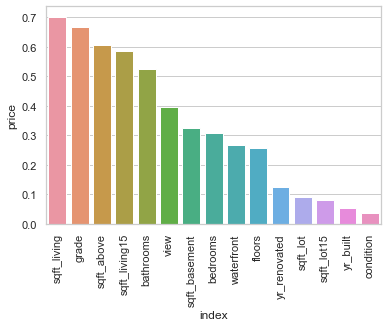

In [9]:
sns.barplot(x='index', y='price', data=df.corr().iloc[0,1:].sort_values(ascending=False).reset_index())#
plt.xticks(rotation = 90)

In [6]:
# # Maps
# import folium
# from folium.plugins import FastMarkerCluster, HeatMap
# lat = df_raw["lat"]
# long = df_raw["long"]

# cordinates = list(zip(lat,long))

# map1 = folium.Map(location=[47.5112,-122.257], zoom_start=10)


# FastMarkerCluster(data=cordinates).add_to(map1)

# map1

## Data preparation

In [8]:
#features
X = df.drop(['price'],axis=1)
#response
y = df['price'].copy()

In [9]:
x_train, x_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25, random_state=42)

#### The table created below will be used to compare especially regression models. 

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'MAE':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

# 1) Regression

## 1.1) Simple Linear Regression
The 'sqft_living' was chosen due to high covariance with the price.

In [79]:
from sklearn.linear_model import LinearRegression
x_simple = np.array(x_train['sqft_living'], dtype=pd.Series).reshape(-1,1)
x_stest = np.array(x_test['sqft_living'], dtype=pd.Series).reshape(-1,1)
model_lr = lm.LinearRegression()

#model training
model_lr.fit(x_simple,y_train) #using all variables

#prediction _ test
pred_simple = model_lr.predict(x_stest)
mae_simple =  m.mean_absolute_error(y_test, pred_simple)
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model_lr.intercept_))
print('Coefficient: {}'.format(model_lr.coef_))

Average Price for Test Data: 547940.266
Intercept: -39814.16265844228
Coefficient: [278.441]


The model is $ y_{price} = -39814.2 + 278.5 * x_{sqftliving}$


Which indicates, that a 1 unit increase on the sqtf_living enrich the house by a 278.5 on the price.


The model's MAE indicates that it can have an error margin of 274446.4 units from the real price.


The nonrandom disposition of the residuals in the graph below indicates a not so good fit of the model.

In [80]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_simple)),'.3f'))
rtrsm = float(format(model_lr.score(x_simple, y_train),'.3f'))
#artrcm = float(format(adjustedR2(model.score(x_simple,y_train),x_simple.shape[0],1),'.3f'))
rtesm = float(format(model_lr.score(x_stest, y_test),'.3f'))
#artecm = float(format(adjustedR2(model.score(x_stest,y_test),x_stest.shape[0],1),'.3f'))
cv = float(format(cross_val_score(model_lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',mae_simple, rmsesm,rtrsm, '-', rtesm,'-',cv]
evaluation


,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.03896,274446.416,0.491,-,0.496,-,0.491


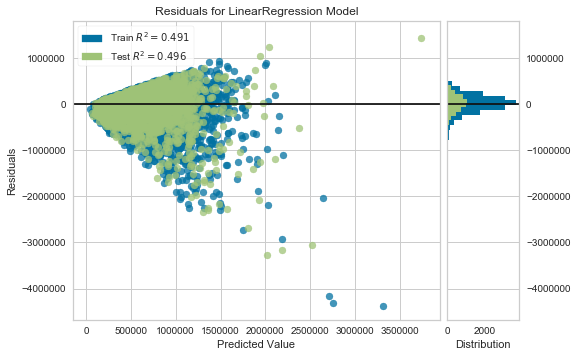

In [36]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_lr)

visualizer.fit(x_simple, y_train)  # Fit the training data to the visualizer
visualizer.score(x_stest, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## 1.2) Multiple Linear Regression


### 1.2.1) With all variables 

In [81]:
lin = LinearRegression()
lin.fit(x_train,y_train)
pred = lin.predict(x_test)
#train
mae= m.mean_absolute_error(y_test, pred)
mape = np.mean(np.abs((y_test - pred)/ y_test))

print('MAE:{}'.format(mae))
print('MAPE:{}'.format(mape))


MAE:142370.3424358193
MAPE:0.29097639696363925


In [82]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrcm = float(format(lin.score(x_train, y_train),'.3f'))
rtecm = float(format(lin.score(x_test, y_test),'.3f'))
artrcm = float(format(adjustedR2(lin.score(x_train,y_train),x_train.shape[0],len(x_train.columns)),'.3f'))
cv = float(format(cross_val_score(model_lr,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(lin.score(x_test,y_test),x_test.shape[0],len(x_train.columns)),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Mult Reg.','all features',mae,rmsem,rtrcm,artrcm,rtecm,artecm,'-']
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-


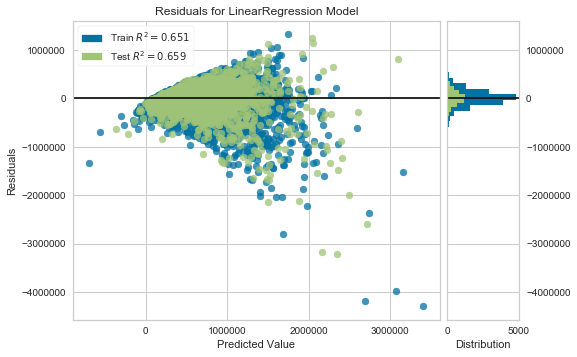

In [39]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

### 1.2.2)  Including the 4 variables with the highest covariance 

In [40]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(x_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_train)
tab = pd.DataFrame({'F Score':fit.scores_ ,
             'Col names ' :x_train.columns,
                   'Pval': fit.pvalues_}).sort_values(by='F Score', ascending = False)
tab

[ 1655.731  6182.592 15653.054   128.016  1093.68   1036.939  2916.688
    15.927 12798.785  9243.088  1852.804    37.909   292.181  8292.254
    94.304]


,F Score,Col names,Pval
2,15653.053741,sqft_living,0.000000e+00
8,12798.785232,grade,0.000000e+00
9,9243.088432,sqft_above,0.000000e+00
13,8292.254482,sqft_living15,0.000000e+00
1,6182.592139,bathrooms,0.000000e+00
6,2916.688438,view,0.000000e+00
10,1852.804385,sqft_basement,0.000000e+00
0,1655.731250,bedrooms,0.000000e+00
4,1093.680050,floors,3.772389e-232
5,1036.938891,waterfront,1.408345e-220


In [83]:
x_multi = x_train[['sqft_living', 'grade','sqft_above', 'sqft_living15']]
x_mtest = x_test[['sqft_living', 'grade','sqft_above', 'sqft_living15']]
model_lr = lm.LinearRegression()

#model training
model_lr.fit(x_multi,y_train) #using all variables

#prediction _ test
pred_test = model_lr.predict(x_mtest)
mae_multi= m.mean_absolute_error(y_test, pred_test)
print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(model_lr.intercept_))
print('Coefficient: {}'.format(model_lr.coef_))

Average Price for Test Data: 547940.266
Intercept: -626224.793710098
Coefficient: [ 2.278e+02  1.027e+05 -8.188e+01  2.582e+01]


In [84]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_test)),'.3f'))
rtrcm = float(format(model_lr.score(x_multi, y_train),'.3f'))
rtecm = float(format(model_lr.score(x_mtest, y_test),'.3f'))
artrcm = float(format(adjustedR2(model_lr.score(x_multi,y_train),x_multi.shape[0],len(x_multi.columns)),'.3f'))
cv = float(format(cross_val_score(model_lr,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(model_lr.score(x_mtest,y_test),x_mtest.shape[0],len(x_mtest.columns)),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','4 features',mae_multi, rmsem,rtrcm,artrcm,rtecm,artecm,cv]
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647


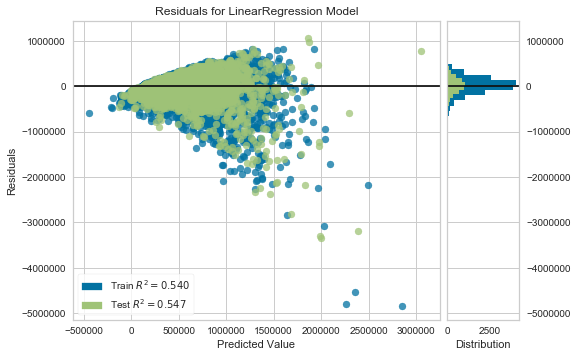

In [43]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_lr)

visualizer.fit(x_multi, y_train)  # Fit the training data to the visualizer
visualizer.score(x_mtest, y_test)  # Evaluate the model on the test data
visualizer.show()   

### 1.2.3) With Standard Scaler

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()
scaler.fit(X)
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.fit_transform(x_test)
df_feat = pd.DataFrame(x_train1,columns=df.columns[1:])
df_feat.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,0.030720,-0.657843,-0.345663,-0.207964,-0.473911,-0.129791
1,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,0.908842,-0.557611,-0.224818,-0.657843,0.709771,-0.207964,-0.385919,-0.339019
2,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,-0.626000,0.296350,-0.078796,-0.657843,0.777864,-0.207964,-0.165941,-0.196068
3,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,-0.772399,-0.452638,1.288558,-0.207964,-1.089851,-0.445025
4,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,-0.626000,-0.557611,-0.614209,-0.657843,0.777864,-0.207964,-0.576568,-0.173196


In [101]:
lin = LinearRegression()
lin.fit(x_train1,y_train)
pred_ss = lin.predict(x_test1)
#train
mae_ss = m.mean_absolute_error(y_test, pred_ss)
mape_ss = np.mean(np.abs((y_test - pred_ss)/ y_test))
mse_ss = mse(y_test, pred_ss)
print('MAE:{}'.format(mae_ss))
print('MAPE:{}'.format(mape_ss))
print('MSE:{}'.format(mse_ss))

MAE:140855.7993016334
MAPE:0.2843620445417883
MSE:51488105061.849785


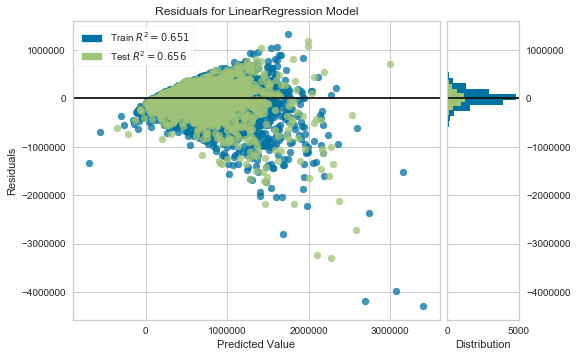

In [46]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin)

visualizer.fit(x_train1, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test1, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [102]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_ss)),'.3f'))
rtrcm = float(format(lin.score(x_train1, y_train),'.3f'))
rtecm = float(format(lin.score(x_test1, y_test),'.3f'))
artrcm = float(format(adjustedR2(lin.score(x_train1,y_train),x_train1.shape[0],len(df_feat.columns)),'.3f'))
# cv = float(format(cross_val_score(model_lr,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(lin.score(x_test1,y_test),x_test1.shape[0],len(df_feat.columns)),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Mult Reg. Standard','all features',mae_ss,rmsem,rtrcm,artrcm,rtecm,artecm,'-']
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647
3,XGB,all features,124780.450101,201370.329,0.800,0.8,0.729,0.728,0.737
4,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517
5,SVM,all features,229067.570304,398405.847,-0.056,-0.057,-0.061,-0.064,-0.062
6,KNN 15,all features,158948.658919,270817.237,0.563,0.562,0.510,0.508,0.498
7,Mult Reg. Standard,all features,140855.799302,226909.905,0.651,0.651,0.656,0.655,-


### 1.2.4) Lasso

Best alpha using built-in LassoCV: 1238323.746795
Best score using built-in LassoCV: 0.523892
bedrooms          -0.000000
bathrooms          0.000000
sqft_living      237.837596
sqft_lot           0.019400
floors             0.000000
waterfront         0.000000
view               0.000000
condition          0.000000
grade              0.000000
sqft_above        -0.000000
sqft_basement     13.849589
yr_built        -572.611686
yr_renovated      72.068942
sqft_living15     77.372549
sqft_lot15        -0.729442
dtype: float64
Lasso picked 7 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

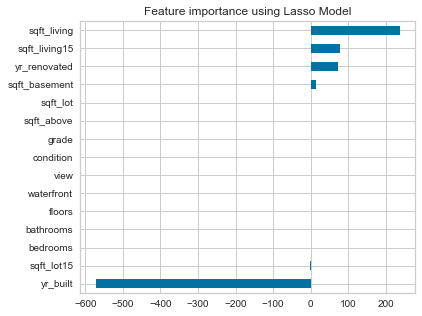

In [88]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
complex_model_R = LassoCV()
complex_model_R.fit(x_train,y_train)

pred_lasso = complex_model_R.predict(x_test)
mae_lasso = m.mean_absolute_error(y_test, pred_lasso)

print("Best alpha using built-in LassoCV: %f" % complex_model_R.alpha_)
print("Best score using built-in LassoCV: %f" %complex_model_R.score(x_train,y_train))

coef = pd.Series(complex_model_R.coef_, index = X.columns)
print(coef)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

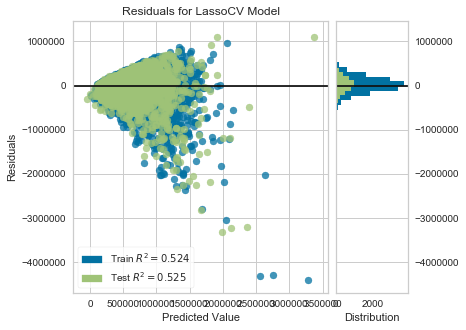

In [49]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(complex_model_R)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [90]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)),'.3f'))
rtrcm = float(format(complex_model_R.score(x_train, y_train),'.3f'))
rtecm = float(format(complex_model_R.score(x_test, y_test),'.3f'))
artrcm = float(format(adjustedR2(complex_model_R.score(x_train,y_train),x_train.shape[0],len(coef)),'.3f'))
cv = float(format(cross_val_score(complex_model_R,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(complex_model_R.score(x_test,y_test),x_test.shape[0],len(coef)),'.3f'))
mae_lasso =  m.mean_absolute_error(y_test, pred_lasso)
r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso','7 features',mae_lasso,rmsem,rtrcm,artrcm,rtecm,artecm,cv]
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647
3,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517
4,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517


## 2) Support Vector Machine 

In [94]:
from sklearn.svm import SVR
sup = SVR()
sup.fit(x_train1, y_train)
pred_svm = sup.predict(x_test1)
mae_svm = m.mean_absolute_error(y_test, pred_svm)

In [95]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_svm)),'.3f'))
rtrcm = float(format(sup.score(x_train1, y_train),'.3f'))
rtecm = float(format(sup.score(x_test1, y_test),'.3f'))
artrcm = float(format(adjustedR2(sup.score(x_train1,y_train),x_train1.shape[0],len(coef)),'.3f'))
cv = float(format(cross_val_score(sup,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(sup.score(x_test1,y_test),x_test1.shape[0],len(coef)),'.3f'))
               
r = evaluation.shape[0]
evaluation.loc[r] = ['SVM','all features',mae_svm,rmsem,rtrcm,artrcm,rtecm,artecm,cv]
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647
3,Mult Reg. Standard,all features,140855.799302,226909.905,0.651,0.651,0.656,0.655,-
4,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517
5,SVM,all features,229067.570304,398405.847,-0.056,-0.057,-0.061,-0.064,-0.062


## 3) K Neighbor Regressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor

def knreg(x_train, y_train, x_test, y_test):
    MAE = []
    l = []
    for i in range(5,50,5):
        knnreg = KNeighborsRegressor(n_neighbors=i)
        knnreg.fit(x_train,y_train)
        pred = knnreg.predict(x_test)
        mae = m.mean_absolute_error(y_test, pred)
        MAE.append(mae)
        l.append(i)
        
    df = pd.DataFrame(list(zip(l,  MAE)), columns =['N', 'Mae'])
    df = df.sort_values(by = 'Mae', ascending = True)
    neighbor = df.iloc[0]['N']
    knnreg = KNeighborsRegressor(n_neighbors=neighbor.astype(int))
    knnreg.fit(x_train,y_train)
    pred = knnreg.predict(x_test)
    mae_kn = m.mean_absolute_error(y_test, pred)
#     mse_kn = mse(y_test, pred)   
    print('MAE:{}'.format(mae))
#print('MAPE:{}'.format(mape_dl))
    print('MSE:{}'.format(mse))
    return mae_kn, knnreg, neighbor, pred
mae_kn, model, knreg, pred_kn = knreg(x_train, y_train, x_test, y_test)

MAE:162450.59473229706
MSE:<function mean_squared_error at 0x0000015B576294C8>


In [97]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred_kn)),'.3f'))
rtrcm = float(format(model.score(x_train, y_train),'.3f'))
rtecm = float(format(model.score(x_test, y_test),'.3f'))
artrcm = float(format(adjustedR2(model.score(x_train,y_train),x_train.shape[0],len(coef)),'.3f'))
cv = float(format(cross_val_score(model,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(model.score(x_test,y_test),x_test.shape[0],len(coef)),'.3f'))
               
r = evaluation.shape[0]
evaluation.loc[r] = ['KNN 15','all features',mae_kn,rmsem,rtrcm,artrcm,rtecm,artecm,cv]
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)
evaluation

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647
3,Mult Reg. Standard,all features,140855.799302,226909.905,0.651,0.651,0.656,0.655,-
4,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517
5,SVM,all features,229067.570304,398405.847,-0.056,-0.057,-0.061,-0.064,-0.062
6,KNN 15,all features,158948.658919,270817.237,0.563,0.562,0.510,0.508,0.498


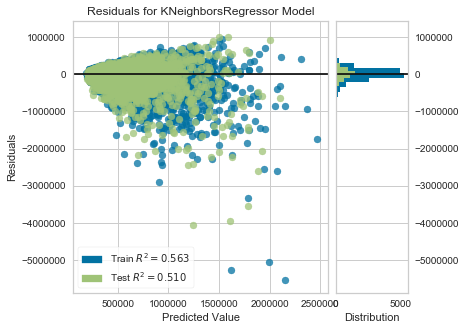

In [55]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

No handles with labels found to put in legend.


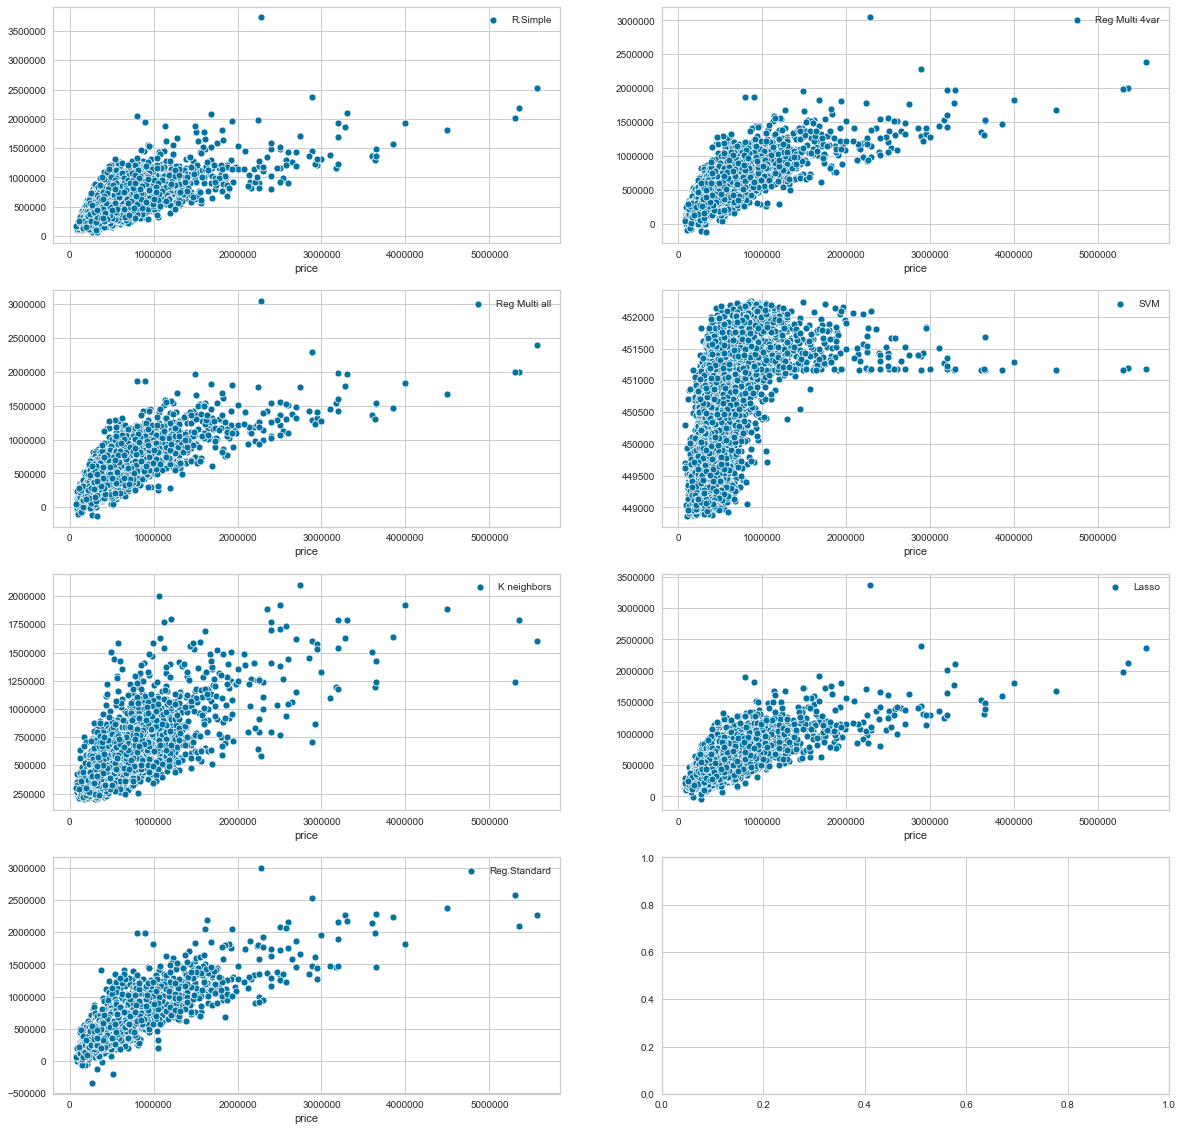

In [56]:
f, axes = plt.subplots(4, 2,figsize=(20,20))
sns.scatterplot(y_test,pred_simple, label = 'R.Simple', ax=axes[0,0])
sns.scatterplot(y_test,pred_test, label = 'Reg Multi 4var',ax=axes[0,1])
sns.scatterplot(y_test,pred_test, label = 'Reg Multi all',ax=axes[1,0])
sns.scatterplot(y_test,pred_svm, label= 'SVM',ax=axes[1,1])
sns.scatterplot(y_test,pred_kn, label= 'K neighbors', ax=axes[2,0])
sns.scatterplot(y_test,pred_lasso, label= 'Lasso',ax=axes[2,1])
sns.scatterplot(y_test,pred_ss, label= 'Reg.Standard', ax=axes[3,0])
# fg = pred_dl.flatten()
# sns.scatterplot(y_test,fg, label= 'Deep L.', ax=axes[3,1])
# plt.plot(pred_test, label= 'Regression')
plt.legend(loc=0)
plt.show()


At this point, the used models did not have a outstanding performance. The best one was the multi linear repression using all variables, but its results were not satisfactory. 

## 4) XGBoost :  gradient boosting decision tree algorithm.

In [57]:
import xgboost 
xgb = xgboost.XGBRegressor(n_estimators=50, learning_rate=0.08, alpha=10, subsample=0.75,
                           colsample_bytree=0.5, max_depth=5)

In [98]:
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)

In [59]:
rmse = np.sqrt(mse(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 201370.329101


In [60]:
data_dmatrix = xgboost.DMatrix(data=X,label=y)
data_dmatrix

In [61]:
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.08,
                'max_depth': 5, 'alpha': 10}

cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[16:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,607536.333333,2205.215698,607816.000000,4500.701245
1,566098.104167,2063.045625,567074.041667,5307.541175
2,528897.354167,1132.524823,530231.843750,7014.834774
3,494204.541667,1050.535107,495971.802083,7502.745403
4,462616.239583,714.973686,465061.208333,7749.401116


In [62]:
print((cv_results["test-rmse-mean"]).tail(1))

49    187355.265625
Name: test-rmse-mean, dtype: float64


[16:07:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


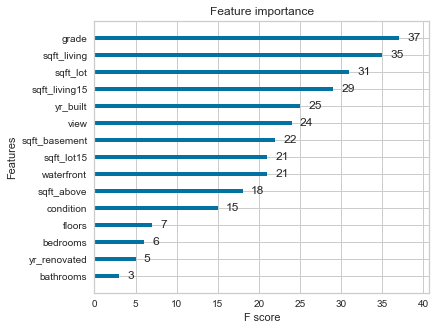

In [63]:
xg_reg = xgboost.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgboost.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

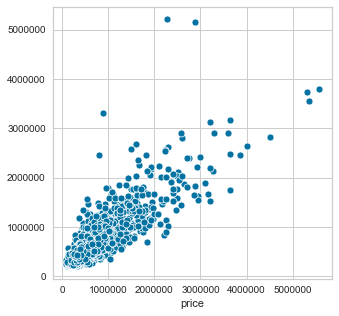

In [64]:
sns.scatterplot(y_test,predictions)

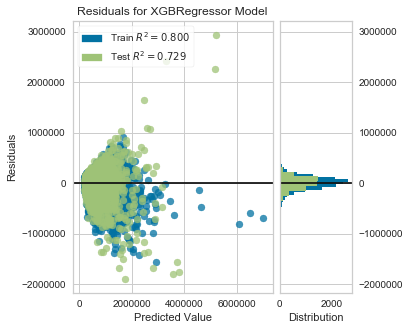

In [65]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xgb)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [111]:
rmsem = float(format(np.sqrt(metrics.mean_squared_error(y_test,predictions)),'.3f'))
rtrcm = float(format(xgb.score(x_train, y_train),'.3f'))
rtecm = float(format(xgb.score(x_test, y_test),'.3f'))
artrcm = float(format(adjustedR2(xgb.score(x_train,y_train),x_train.shape[0],len(coef)),'.3f'))
cv = float(format(cross_val_score(xgb,X,y,cv=5).mean(),'.3f'))
artecm = float(format(adjustedR2(xgb.score(x_test,y_test),x_test.shape[0],len(coef)),'.3f'))
maexgb =   m.mean_absolute_error(y_test, predictions)               
r = evaluation.shape[0]
evaluation.loc[r] = ['XGB','all features',maexgb,rmsem,rtrcm,artrcm,rtecm,artecm,cv]
#evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)


In [110]:
evaluation.drop(evaluation.index[8])

,Model,Details,MAE,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,177572.038960,274446.416,0.491,-,0.496,-,0.491
1,Mult Reg.,all features,142370.342436,225859.561,0.651,0.651,0.659,0.658,-
2,Multiple Regression-1,4 features,165279.439805,260231.057,0.540,0.54,0.547,0.547,0.647
3,XGB,all features,124780.450101,201370.329,0.800,0.8,0.729,0.728,0.737
4,Lasso,7 features,171301.934784,266522.994,0.524,0.523,0.525,0.524,0.517
5,SVM,all features,229067.570304,398405.847,-0.056,-0.057,-0.061,-0.064,-0.062
6,KNN 15,all features,158948.658919,270817.237,0.563,0.562,0.510,0.508,0.498
7,Mult Reg. Standard,all features,140855.799302,226909.905,0.651,0.651,0.656,0.655,-


###### XGBoost outperformed other models and showed the best $R^2$ 

Using decision-trees and other tools, XGBoost achieved the best result. Features as sqrt_living, grade, sqrt_lot, sqrt_living15 were the most important to this model. But for the regression ones, sqrt_above replaces sqrt_lot on the top features. 